In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

## 1. Defining the problem 

In [2]:
ad_slots = ['Topbar', 'Sidebar', 'Footer', 'Pop-Up']
true_ctr = np.random.randint(1, 11, size=4) / 100
n_arms = len(ad_slots)


## 2. Defining the epsilon greedy algorithm

In [3]:
class epsilon_greedy:
    def __init__(self, n_arms, epsilon):
        self.n_arms = n_arms
        self.epsilon = epsilon
        self.counts = np.zeros(n_arms)
        self.values = np.zeros(n_arms)
    
    def select_arm(self):
        if np.random.random() < self.epsilon:
            return np.random.randint(0, self.n_arms)
        else:
            return np.argmax(self.values)
    
    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        self.values[chosen_arm] = ((n-1)/n) * value + (1/n) * reward
        

### a.) Set Up Epsilon-Greedy Algorithm
- 90-10 split between exploiting and exploring

In [4]:
epsilon = 0.1
agent = epsilon_greedy(n_arms, epsilon)

### b.) Run the simulation

In [5]:
n_impressions = 1000
total_rewards = np.zeros(n_arms)

## 3. Simulate the ad display and click tracking process

In [6]:
for i in range(n_impressions):
    chosen_ad = agent.select_arm()

    reward = 1 if np.random.random() < true_ctr[chosen_ad] else 0
    agent.update(chosen_ad, reward)
    total_rewards[chosen_ad] += reward

In [7]:
for ad in range(n_arms):
    print(f"Ad {ad}: {total_rewards[ad]} clicks out of {n_impressions} impressions")


Ad 0: 8.0 clicks out of 1000 impressions
Ad 1: 0.0 clicks out of 1000 impressions
Ad 2: 14.0 clicks out of 1000 impressions
Ad 3: 18.0 clicks out of 1000 impressions


In [8]:
for ad in range(n_arms):
    print(f"{ad_slots [ad]} (Ad slots {ad+1}):")
    print(f" True CTR : {true_ctr[ad]}")
    print(f" Estimated CTR : {agent.values[ad]:.3f}")
    print(f" Impressions : {int(agent.counts[ad])}")
    print(f" Clicks : {int(total_rewards[ad])}\n")

Topbar (Ad slots 1):
 True CTR : 0.04
 Estimated CTR : 0.028
 Impressions : 288
 Clicks : 8

Sidebar (Ad slots 2):
 True CTR : 0.09
 Estimated CTR : 0.000
 Impressions : 22
 Clicks : 0

Footer (Ad slots 3):
 True CTR : 0.06
 Estimated CTR : 0.055
 Impressions : 253
 Clicks : 14

Pop-Up (Ad slots 4):
 True CTR : 0.04
 Estimated CTR : 0.041
 Impressions : 437
 Clicks : 18



In [9]:
best_ad = np.argmax(agent.values)
print(f"Best performing ad slot: {ad_slots[best_ad]} (Ad Slot {best_ad+1}) with Estimated CTR: {agent.values[best_ad]:.3f}")

Best performing ad slot: Footer (Ad Slot 3) with Estimated CTR: 0.055


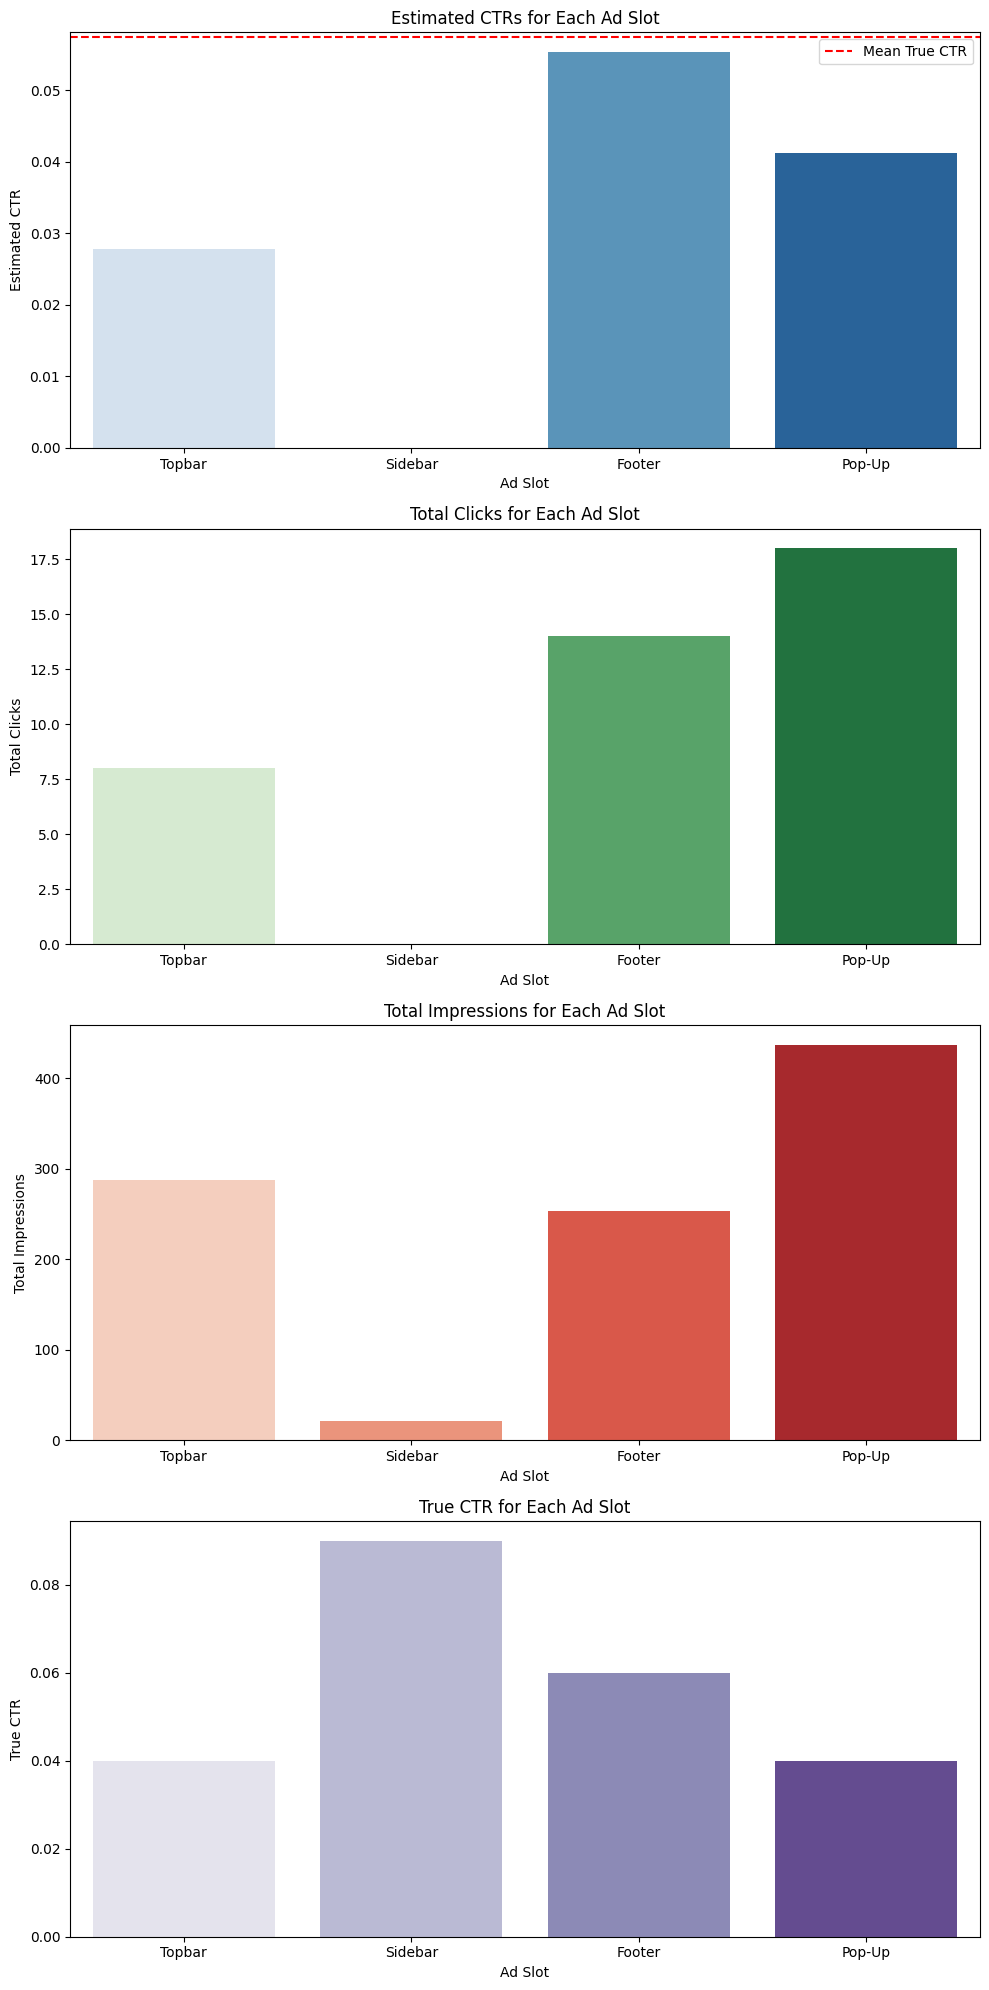

In [10]:
warnings.filterwarnings("ignore")

data = {
    'Ad Slot': ad_slots,
    'Estimated CTR': agent.values,
    'Total Clicks': total_rewards,
    'Total Impressions': agent.counts,
    'True CTR': true_ctr
}
df = pd.DataFrame(data)

plt.figure(figsize=(10, 20))

# Estimated CTRs Plot
plt.subplot(4, 1, 1)
sns.barplot(x='Ad Slot', y='Estimated CTR', data=df, palette='Blues')
plt.axhline(y=np.mean(true_ctr), color='r', linestyle='--', label='Mean True CTR')
plt.title('Estimated CTRs for Each Ad Slot')
plt.ylabel('Estimated CTR')
plt.legend()

# Total Clicks Plot
plt.subplot(4, 1, 2)
sns.barplot(x='Ad Slot', y='Total Clicks', data=df, palette='Greens')
plt.title('Total Clicks for Each Ad Slot')
plt.ylabel('Total Clicks')

# Impressions Plot
plt.subplot(4, 1, 3)
sns.barplot(x='Ad Slot', y='Total Impressions', data=df, palette='Reds')
plt.title('Total Impressions for Each Ad Slot')
plt.ylabel('Total Impressions')

# True CTR Plot
plt.subplot(4, 1, 4)
sns.barplot(x='Ad Slot', y='True CTR', data=df, palette='Purples')
plt.title('True CTR for Each Ad Slot')
plt.ylabel('True CTR')

# Adjust layout and show plot
plt.tight_layout()
plt.show()
